# Naive Bayes

## Kütüphaneler

In [2]:
!pip install matplotlib pandas numpy scikit-learn openpyxl

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

%run dataPreprocessing.ipynb

Veri seti boyutu: (9400, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9400 non-null   int64  
 1   gender             9400 non-null   object 
 2   age                9400 non-null   float64
 3   hypertension       9400 non-null   int64  
 4   heart_disease      9400 non-null   int64  
 5   ever_married       9400 non-null   object 
 6   work_type          9400 non-null   object 
 7   Residence_type     9400 non-null   object 
 8   avg_glucose_level  9400 non-null   float64
 9   bmi                9400 non-null   float64
 10  smoking_status     9400 non-null   object 
 11  stroke             9400 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 881.4+ KB
None
                 id          age  hypertension  heart_disease  \
count   9400.000000  9400.000000   9400.000000    9400.000

## Eğitim ve Test Verisinin Ayrılması

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## GaussianNB sınıfının tanımlanması

In [4]:
class CustomGaussianNB:
    def __init__(self):
        self.classes = None
        self.mean = {}
        self.var = {}
        self.priors = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            X_cls = X[y == cls]
            self.mean[cls] = X_cls.mean(axis=0)
            self.var[cls] = X_cls.var(axis=0)
            self.priors[cls] = len(X_cls) / float(len(X))

    def gaussian_log_prob(self, x, mean, var):
        eps = 1e-9  # Bölme sıfır hatasını önlemek için
        var = np.asarray(var, dtype=np.float64)
        coeff = -0.5 * np.log(2.0 * np.pi * var + eps)
        exponent = - ((x - mean) ** 2) / (2 * var + eps)
        return coeff + exponent

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            sample = X[i]
            class_probs = {}
            for cls in self.classes:
                log_prior = np.log(self.priors[cls])
                log_likelihood = np.sum(self.gaussian_log_prob(sample, self.mean[cls], self.var[cls]))
                class_probs[cls] = log_prior + log_likelihood
            y_pred.append(max(class_probs, key=class_probs.get))
        return np.array(y_pred)

## Veri Setlerini numpy Arraye Çevirme

In [5]:
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

## Modeli oluşturma ve eğitme

In [6]:
print("\n--- Custom GaussianNB Modeli ---")
custom_model = CustomGaussianNB()
start_time = time.time()
custom_model.fit(X_train_np, y_train_np)
custom_fit_time = time.time() - start_time


--- Custom GaussianNB Modeli ---


## Performan Ölçümleri ve Matris Oluşturma

Custom Model Eğitim Süresi: 0.001268 sn
Custom Model Tahmin Süresi: 0.068243 sn
Custom Model Doğruluk Oranı: 0.5719858156028369
Custom Model Karmaşıklık Matrisi:
 [[ 187 1203]
 [   4 1426]]


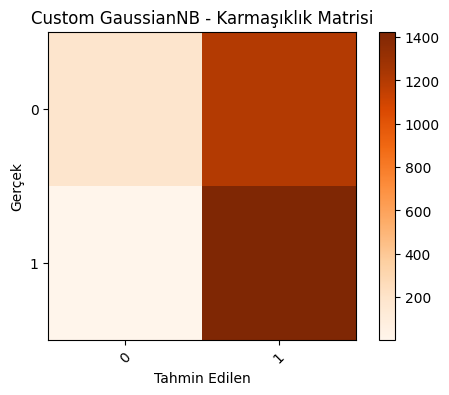

In [7]:
start_time = time.time()
y_pred_custom = custom_model.predict(X_test_np)
custom_predict_time = time.time() - start_time
custom_cm = confusion_matrix(y_test_np, y_pred_custom)
custom_accuracy = accuracy_score(y_test_np, y_pred_custom)

print("Custom Model Eğitim Süresi: {:.6f} sn".format(custom_fit_time))
print("Custom Model Tahmin Süresi: {:.6f} sn".format(custom_predict_time))
print("Custom Model Doğruluk Oranı:", custom_accuracy)
print("Custom Model Karmaşıklık Matrisi:\n", custom_cm)

classes = np.unique(y)
tick_marks = np.arange(len(classes))

plt.figure(figsize=(6, 4))
plt.imshow(custom_cm, interpolation='nearest', cmap=plt.cm.Oranges)
plt.title("Custom GaussianNB - Karmaşıklık Matrisi")
plt.colorbar()
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()